# Segmentation with Ground Truth



## Open and show input

Open the input file with a special helper that open imagej tifs and reads and returns the spacings along with the image data.  Then show xyz maximum projections.

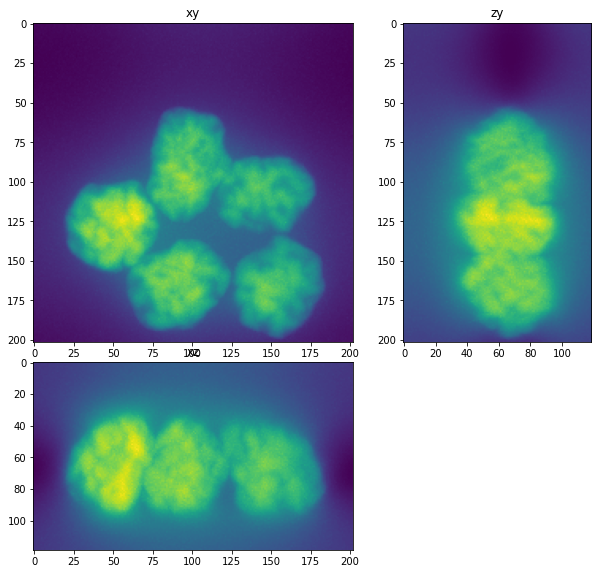

In [1]:
from tnia.io.tifffile_helper import open_ij3D
from tnia.plotting.projections import show_xyz_max, show_xyz_slice, show_xy_yz_slice
from tnia.nd.ndutil import centercrop
from skimage.io import imread
from clij2fft.richardson_lucy import richardson_lucy, richardson_lucy_nc

input_dir = 'D:\\images\\'
input_name=input_dir+"\\tnia-python-images\\notebooks\\segmentation\\nuclei_ij\\SIM delta 1.5 NA.tif"
input_name=input_dir+"\\tnia-python-images\\notebooks\\segmentation\\nuclei_ij\\SIM 1.5 NA.tif"


im_orig=imread(input_name)

#im_orig, sx, sy, sz = open_ij3D(input_name)
#print(sx, sy, sz)
fig=show_xyz_max(im_orig)

# Open and show ground truth


In [2]:
def MSE(a,b):
    return np.square(np.subtract(a,b)).mean()

def RMSE(a,b):
    return np.sqrt(MSE(a,b))

original sum intensity 10979002000.0
imaged sum intensity 10016815000.0
ratio 0.91236115


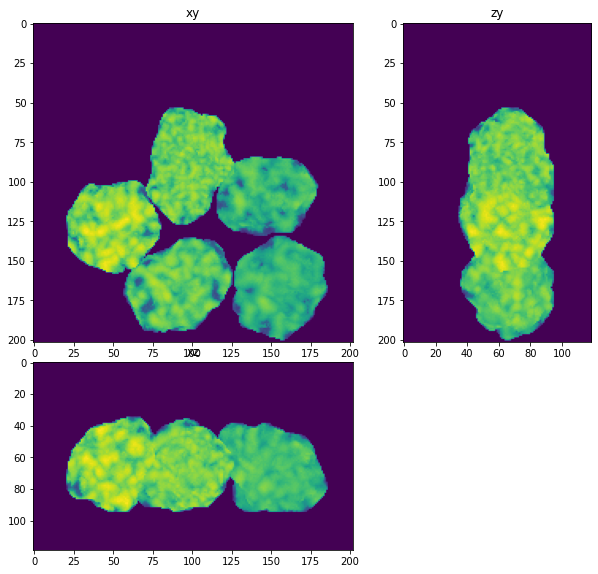

In [3]:
#D:\images             \tnia-python-images\notebooks\segmentaion\nuclei
from skimage.io import imread

truth_name=input_dir+"\\tnia-python-images\\notebooks\\segmentation\\nuclei_ij\\phantom.tif"

ground_truth = imread(truth_name)
ground_truth = ground_truth.astype('float32')
print('original sum intensity',ground_truth.sum())
print('imaged sum intensity',im_orig.sum())
print('ratio',im_orig.sum()/ground_truth.sum())


fig=show_xyz_max(ground_truth)

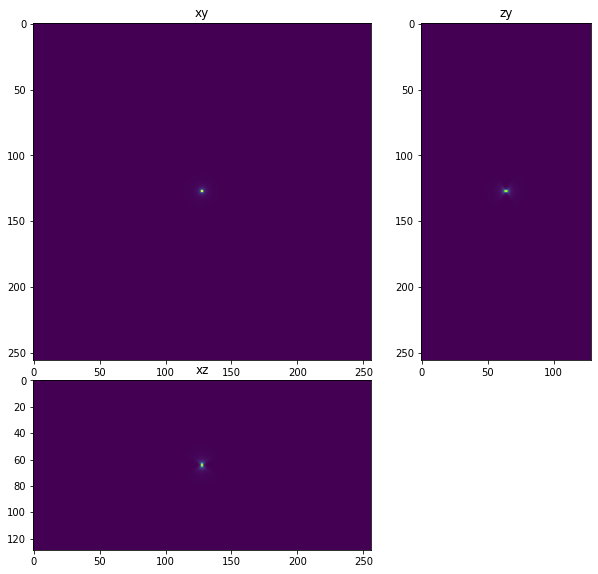

In [4]:
psf_name=input_dir+"\\tnia-python-images\\notebooks\\segmentation\\nuclei_ij\\PSF 1.5 NA.tif"

psf=imread(psf_name)
psf_cropped=centercrop(psf,[100,64,64])
#psf, sx, sy, sz = open_ij3D(input_name)
'''
print(sx, sy, sz)

psf_xy = 129
psf_z = 51

x_start=int(psf.shape[2]/2-psf_xy/2)
y_start=int(psf.shape[1]/2-psf_xy/2)
z_start=int(psf.shape[0]/2-psf_z/2)

psf=psf[z_start:z_start+psf_z,y_start:y_start+psf_xy,x_start:x_start+psf_xy]
'''
fig=show_xyz_max(psf)

In [7]:
im_decon_tv=richardson_lucy_nc(im_orig, psf, 1000, 0.00005)

get lib


get lib
get lib


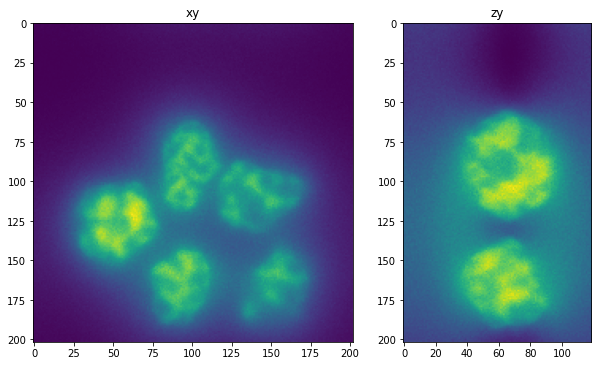

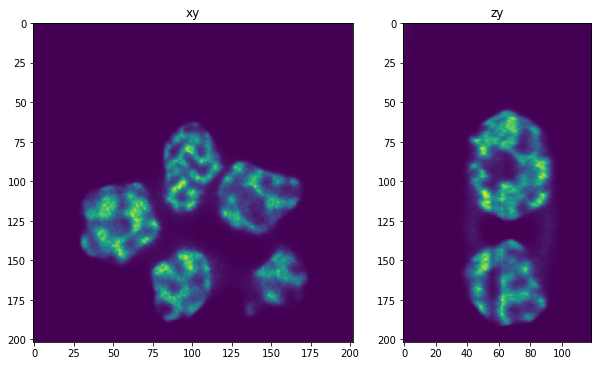

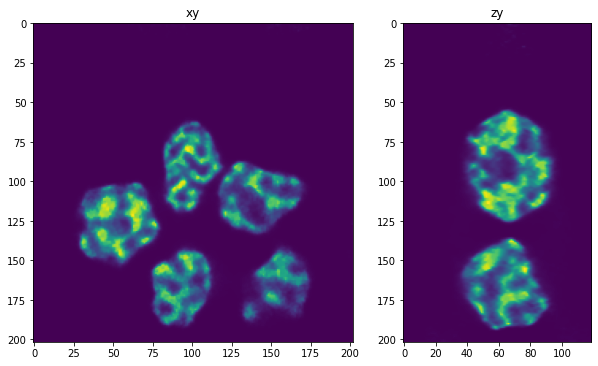

In [8]:
im_decon=richardson_lucy(im_orig, psf, 1000)
im_decon_nc=richardson_lucy_nc(im_orig, psf, 1000)
fig=show_xy_yz_slice(im_orig,100,100,50,1)
fig=show_xy_yz_slice(im_decon,100,100,50,1)
fig=show_xy_yz_slice(im_decon_tv,100,100,50,1)


In [9]:
print('rl',RMSE(ground_truth, im_decon))
print('rlnc',RMSE(ground_truth, im_decon_nc))

rl 2975.114
rlnc 2330.8367


In [10]:
im_decon_tv_002=richardson_lucy_nc(im_orig, psf, 1000, 0.002)
im_decon_tv_001=richardson_lucy_nc(im_orig, psf, 1000, 0.001)
im_decon_tv_0005=richardson_lucy_nc(im_orig, psf, 1000, 0.0005)

get lib
get lib
get lib


In [23]:
im_decon_tv_0002=richardson_lucy_nc(im_orig, psf, 1000, 0.0002)
im_decon_tv_0001=richardson_lucy_nc(im_orig, psf, 1000, 0.0001)
im_decon_tv_00005=richardson_lucy_nc(im_orig, psf, 1000, 0.00005)

get lib
get lib
get lib


In [11]:
from clij2fft.richardson_lucy import richardson_lucy, richardson_lucy_nc

im_decon_100=richardson_lucy_nc(im_orig, psf, 100, 0)
im_decon_200=richardson_lucy_nc(im_orig, psf, 200, 0)
im_decon_300=richardson_lucy_nc(im_orig, psf, 300, 0)
im_decon_400=richardson_lucy_nc(im_orig, psf, 400, 0)
im_decon_1000=richardson_lucy_nc(im_orig, psf, 1000, 0)


get lib
get lib
get lib
get lib
get lib


In [12]:
thresholded_truth_above_zero = ground_truth>0

In [13]:
from skimage.filters import threshold_otsu
thresholded = im_orig>threshold_otsu(im_orig)
thresholded_decon = im_decon_tv>threshold_otsu(im_decon_tv)
thresholded_truth = ground_truth>threshold_otsu(ground_truth)

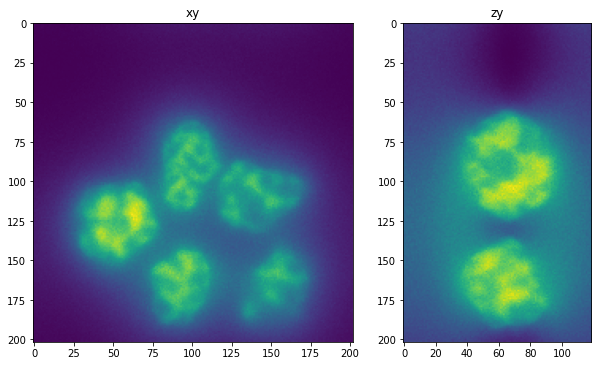

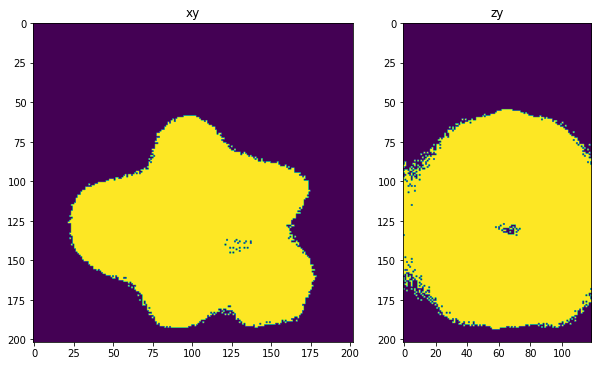

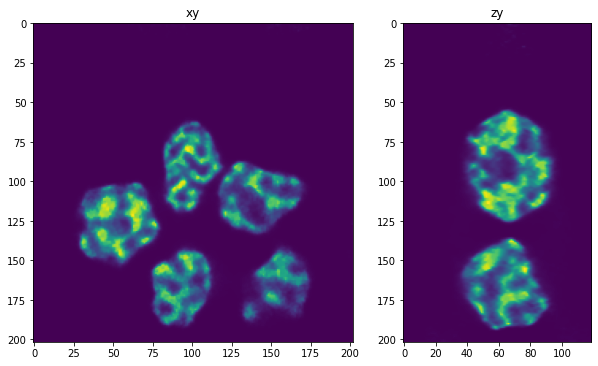

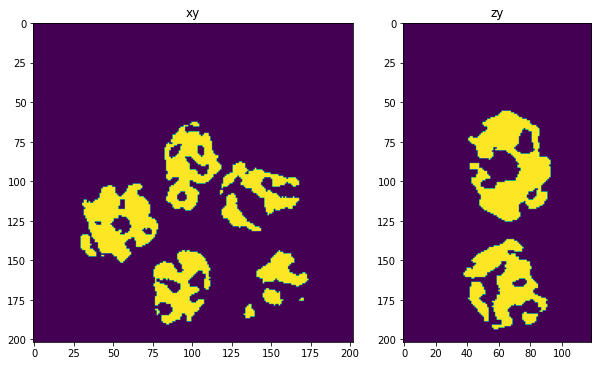

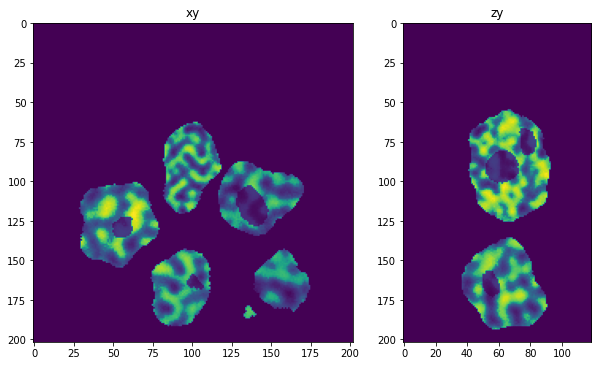

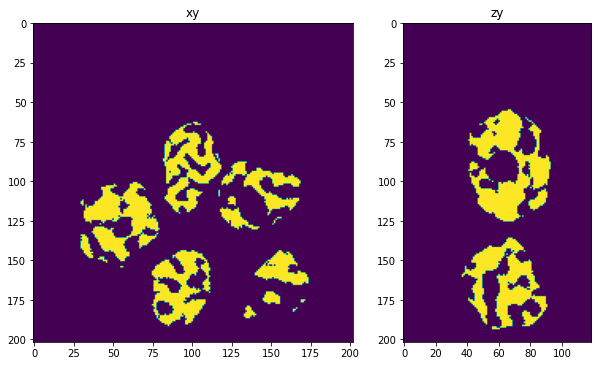

In [14]:
fig = show_xy_yz_slice(im_orig, 100,100,50,1)
fig = show_xy_yz_slice(thresholded, 100,100,50,1)
fig = show_xy_yz_slice(im_decon_tv, 100,100,50,1)
fig = show_xy_yz_slice(thresholded_decon, 100,100,50,1)
fig = show_xy_yz_slice(ground_truth, 100,100,50,1)
fig = show_xy_yz_slice(thresholded_truth, 100,100,50,1)

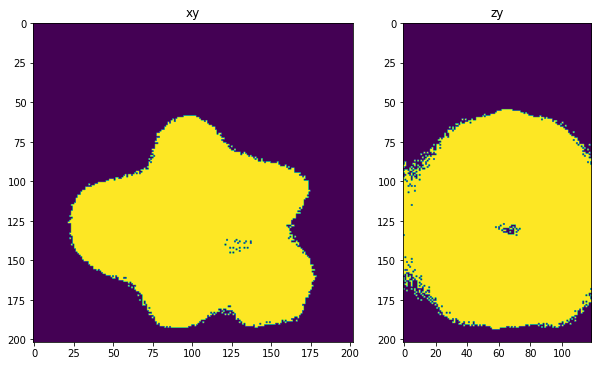

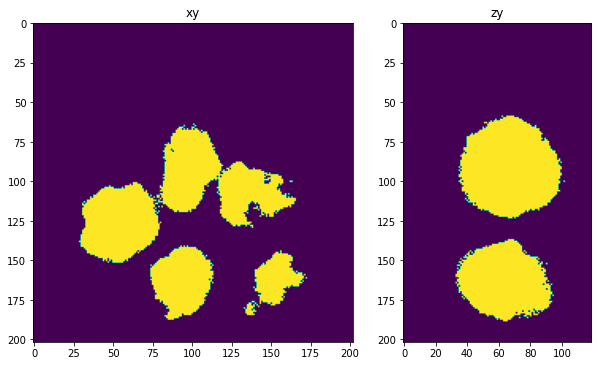

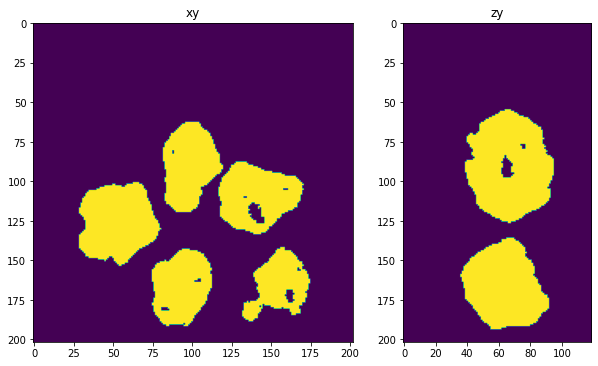

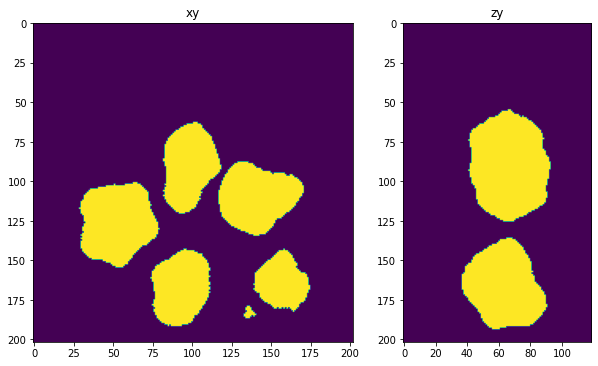

In [16]:
thresholded_multi=im_orig>threshold_otsu(im_orig[thresholded>0])
thresholded_decon_multi=im_decon_tv>threshold_otsu(im_decon_tv[thresholded_decon==0])
fig = show_xy_yz_slice(thresholded, 100,100,50,1)
fig = show_xy_yz_slice(thresholded_multi, 100,100,50,1)
fig = show_xy_yz_slice(thresholded_decon_multi, 100,100,50,1)
fig = show_xy_yz_slice(thresholded_truth_above_zero, 100,100,50,1)

In [21]:
from tnia.morphology.fill_holes import fill_holes_3d_slicer
fill_holes_3d_slicer(thresholded_decon_multi,1000,1)
fill_holes_3d_slicer(thresholded_multi,1000,1)


In [22]:
e_thresholded=thresholded!=thresholded_truth_above_zero
e_thresholded_multi=thresholded_multi!=thresholded_truth_above_zero
e_thresholded_decon=thresholded_decon!=thresholded_truth_above_zero
e_thresholded_decon_multi=thresholded_decon_multi!=thresholded_truth_above_zero
e_thresholded_truth=thresholded_truth_above_zero!=thresholded_truth_above_zero


C:\Users\bnort\miniconda3\envs\tnia_deconware\lib\site-packages\matplotlib\cbook\__init__.py:187: RuntimeWarning: coroutine 'get_msg' was never awaited
  self._cid_gen = itertools.count()


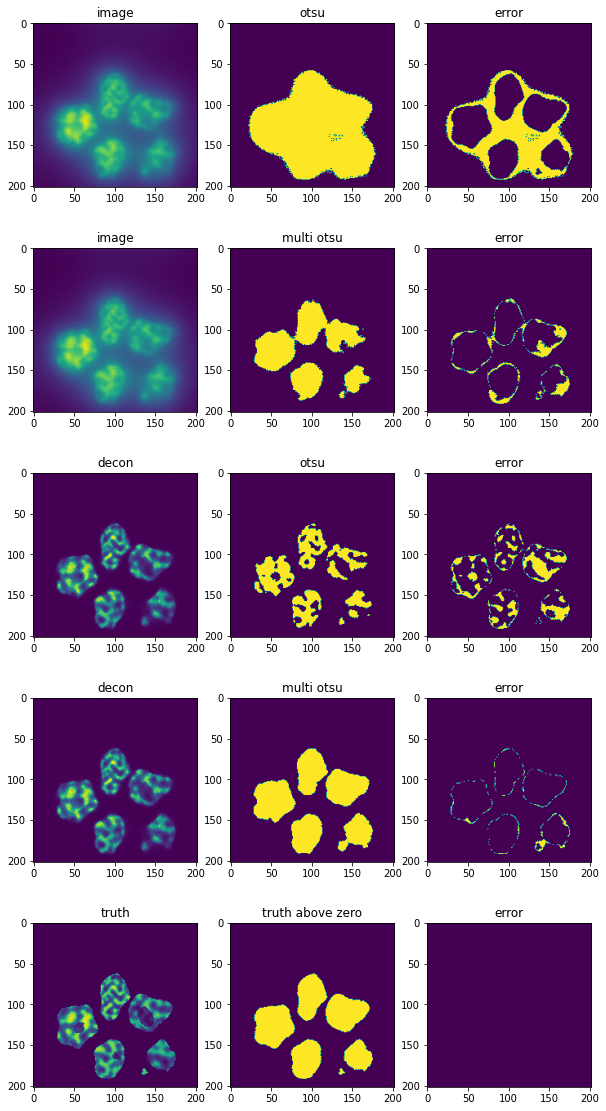

In [23]:
from tnia.plotting.plt_helper import imshow_multi2d

ims=[im_orig[50,:,:], thresholded[50,:,:], e_thresholded[50,:,:],
     im_orig[50,:,:], thresholded_multi[50,:,:], e_thresholded_multi[50,:,:],
     im_decon_tv[50,:,:],thresholded_decon[50,:,:],e_thresholded_decon[50,:,:],
     im_decon_tv[50,:,:],thresholded_decon_multi[50,:,:], e_thresholded_decon_multi[50,:,:], 
     ground_truth[50,:,:],thresholded_truth_above_zero[50,:,:], e_thresholded_truth[50,:,:],]
titles=['image', 'otsu', 'error','image','multi otsu','error', 'decon','otsu','error',
        'decon','multi otsu','error','truth','truth above zero','error']

fig=imshow_multi2d(ims,titles,5,3,10,20)
import matplotlib.pyplot as plt
fig.savefig('test.png')

In [33]:
thresholded_multi=thresholded_multi.astype('uint8')
thresholded_multi[thresholded_multi>0]=thresholded_multi[thresholded_multi>0]+1

In [34]:
thresholded_multi.max()

2

In [35]:
import napari
viewer=napari.Viewer()
viewer.add_image(ground_truth)
viewer.add_image(im_orig)
viewer.add_image(im_decon_tv)
viewer.add_labels(thresholded_multi)
viewer.add_labels(thresholded_decon_multi)

C:\Users\bnort\AppData\Roaming\Python\Python39\site-packages\napari\utils\events\event.py:290: RuntimeWarning: coroutine 'get_msg' was never awaited
  self._block_counter: _WeakCounter[Optional[Callback]] = _WeakCounter()


<Labels layer 'thresholded_decon_multi' at 0x22658a8dd00>

Exception in callback BaseAsyncIOLoop._handle_events(8900, 1)
handle: <Handle BaseAsyncIOLoop._handle_events(8900, 1)>
Traceback (most recent call last):
  File "C:\Users\bnort\miniconda3\envs\tnia_deconware\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\bnort\miniconda3\envs\tnia_deconware\lib\site-packages\tornado\platform\asyncio.py", line 189, in _handle_events
    handler_func(fileobj, events)
  File "C:\Users\bnort\miniconda3\envs\tnia_deconware\lib\site-packages\zmq\eventloop\zmqstream.py", line 452, in _handle_events
    self._handle_recv()
  File "C:\Users\bnort\miniconda3\envs\tnia_deconware\lib\site-packages\zmq\eventloop\zmqstream.py", line 481, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\bnort\miniconda3\envs\tnia_deconware\lib\site-packages\zmq\eventloop\zmqstream.py", line 431, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\bnort\miniconda3\envs\tnia_deconware\lib\si

In [98]:
import pandas as pd
stats=pd.DataFrame(columns=['image','volume (pixels)','error (pixels)'])

stats.loc[0]=['truth',thresholded_truth_above_zero.sum(),e_thresholded_truth.sum()]
stats.loc[1]=['thresholded',thresholded.sum(),e_thresholded.sum()]
stats.loc[2]=['thresholded multi',thresholded_multi.sum(),e_thresholded_multi.sum()]
stats.loc[3]=['thresholded decon',thresholded_decon.sum(),e_thresholded_decon.sum()]
stats.loc[4]=['thresholded decon multi',thresholded_decon_multi.sum(),e_thresholded_decon_multi.sum()]
display(stats)

,image,volume (pixels),error (pixels)
0,truth,454726,0
1,thresholded,1400252,950270
2,thresholded multi,419685,147579
3,thresholded decon,292277,165209
4,thresholded decon multi,470056,36390


149059
45920


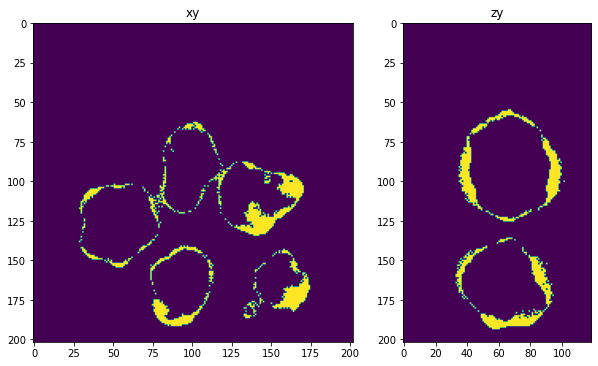

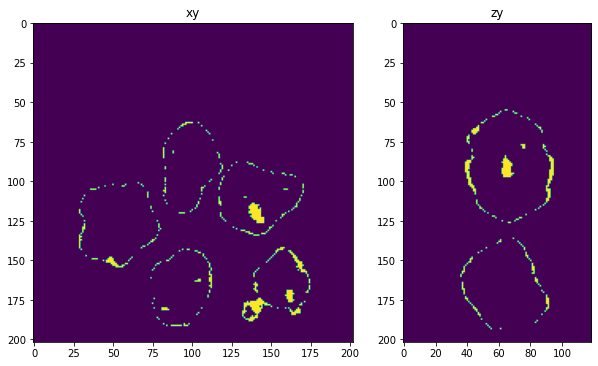

In [62]:
fig = show_xy_yz_slice(thresholded_multi!=thresholded_truth_above_zero, 100,100,50,1)
fig = show_xy_yz_slice(thresholded_decon_multi!=thresholded_truth_above_zero, 100,100,50,1)
print( (thresholded_multi!=thresholded_truth_above_zero).sum())
print( (thresholded_decon_multi!=thresholded_truth_above_zero).sum())

In [46]:
from tnia.morphology.fill_holes import fill_holes_3d_slicer
from skimage.morphology import cube, binary_closing

thresholded_decon=binary_closing(thresholded_decon, cube(7))
thresholded_truth=binary_closing(thresholded_truth, cube(7))

fill_holes_3d_slicer(thresholded,10000,3)
fill_holes_3d_slicer(thresholded_decon,10000,3)
fill_holes_3d_slicer(thresholded_truth,10000,3)


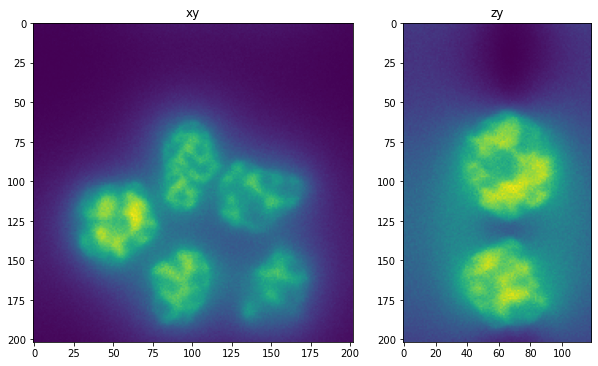

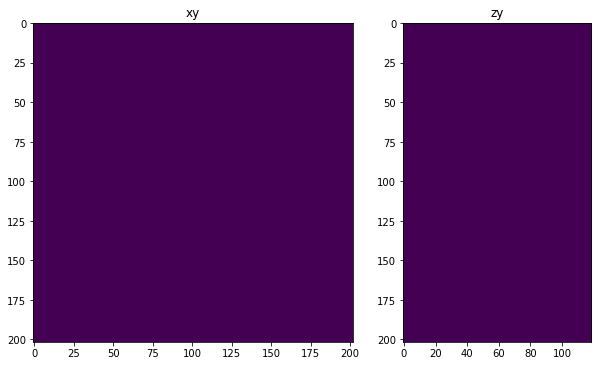

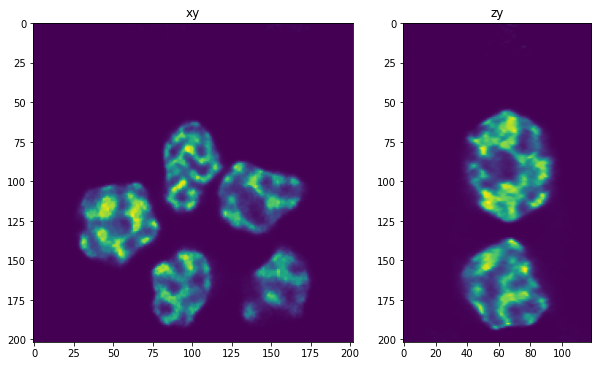

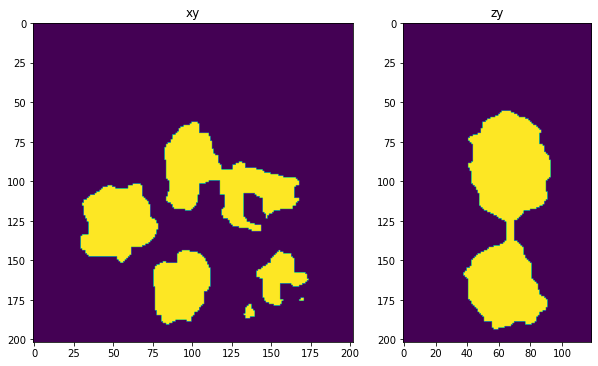

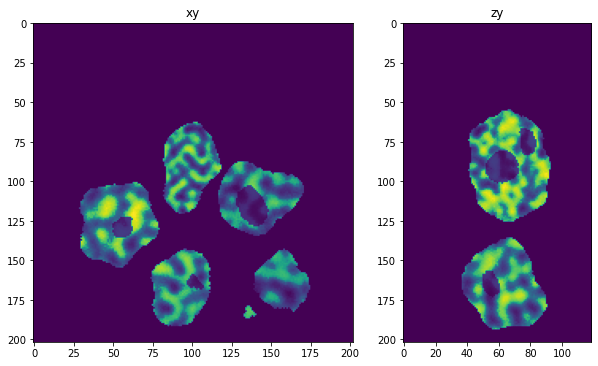

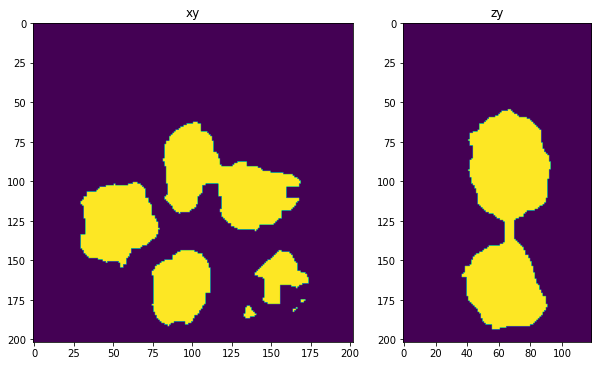

In [47]:
fig = show_xy_yz_slice(im_orig, 100,100,50,1)
fig = show_xy_yz_slice(thresholded, 100,100,50,1)
fig = show_xy_yz_slice(im_decon_tv, 100,100,50,1)
fig = show_xy_yz_slice(thresholded_decon, 100,100,50,1)
fig = show_xy_yz_slice(ground_truth, 100,100,50,1)
fig = show_xy_yz_slice(thresholded_truth, 100,100,50,1)

In [15]:
print('truth',RMSE(ground_truth,im_orig))
print('100',RMSE(ground_truth,im_decon_100))
print('200',RMSE(ground_truth,im_decon_200))
print('300',RMSE(ground_truth,im_decon_300))
print('400',RMSE(ground_truth,im_decon_400))
print('1000',RMSE(ground_truth,im_decon_1000))
print('tv 002',RMSE(ground_truth,im_decon_tv_002))
print('tv 001',RMSE(ground_truth,im_decon_tv_001))
print('tv 0005',RMSE(ground_truth,im_decon_tv_0005))
print('tv 0002',RMSE(ground_truth,im_decon_tv_0002))
print('tv 0001',RMSE(ground_truth,im_decon_tv_0001))
print('tv 00005',RMSE(ground_truth,im_decon_tv_00005))


truth 7267.49


NameError: name 'im_decon_100' is not defined

In [22]:
print(im_decon.sum()/ground_truth.sum())

NameError: name 'im_decon' is not defined

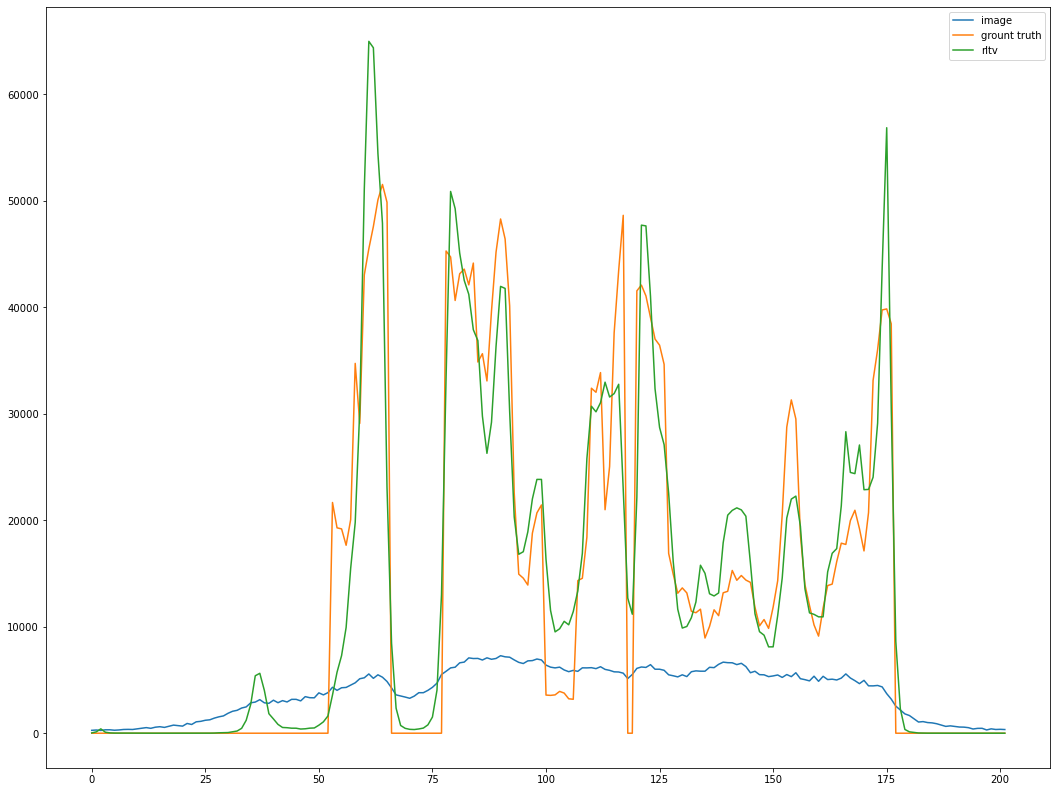

In [29]:
import matplotlib.pyplot as plt
s=im_orig.shape

fig, ax = plt.subplots(figsize=(18,14))

line=im_orig[int(s[0]/2),int(s[1]/2),:]
ax.plot(line, label = 'image')

line2=im_decon_200[int(s[0]/2),int(s[1]/2),:]
#ax.plot(line2, label='rl')
line3=ground_truth[int(s[0]/2),int(s[1]/2),:]
ax.plot(line3, label='grount truth')
line4=im_decon_tv[int(s[0]/2),int(s[1]/2),:]
ax.plot(line4, label='rltv')
ax.legend()

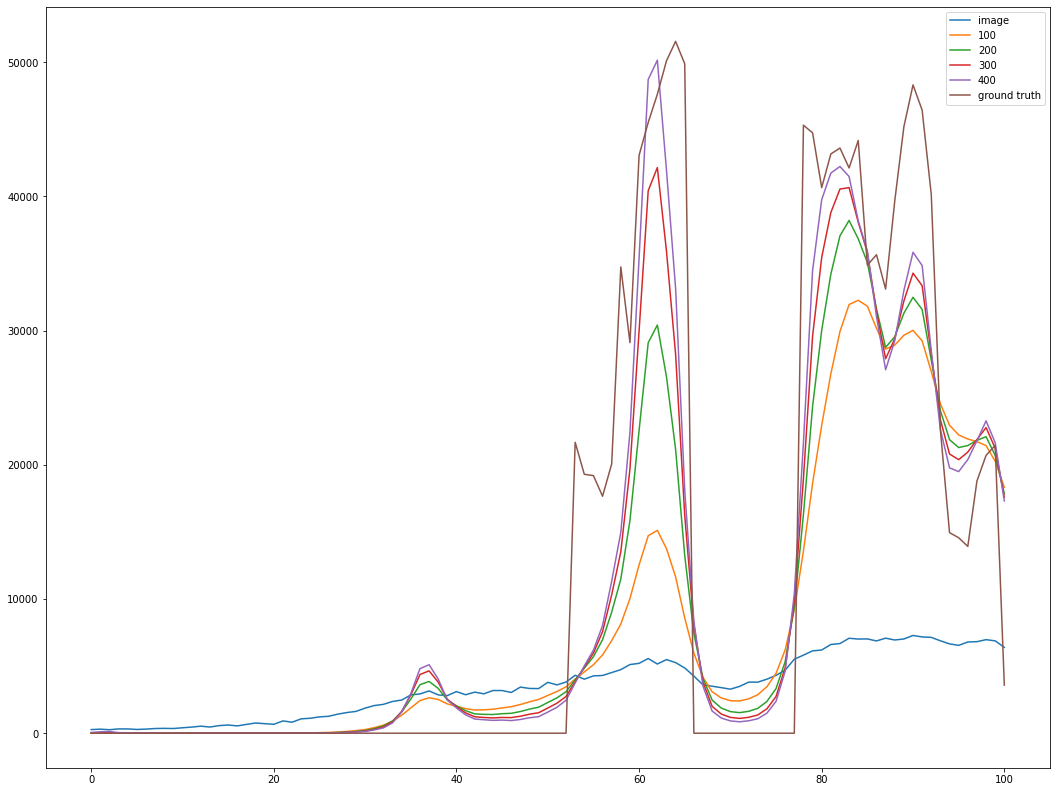

In [25]:
import matplotlib.pyplot as plt
s=im_orig.shape

fig, ax = plt.subplots(figsize=(18,14))

from skimage.draw import line
rr, cc =  line(int(s[1]/2),0,int(s[1]/2),int(s[2]/2-1))
z=int(s[0]/2),

line=im_orig[z, rr, cc]
ax.plot(line, label = 'image')

line2=im_decon_100[z, rr, cc]
ax.plot(line2, label='100')

line4=im_decon_200[z, rr, cc]
ax.plot(line4, label='200')
ax.legend()

line4=im_decon_300[z, rr, cc]
ax.plot(line4, label='300')
ax.legend()

line4=im_decon_400[z, rr, cc]
ax.plot(line4, label='400')
ax.legend()

line3=ground_truth[z, rr, cc]
ax.plot(line3, label='ground truth')
ax.legend()


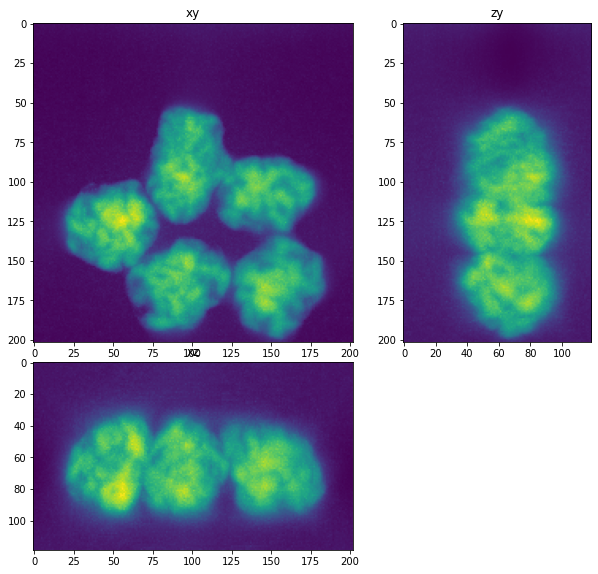

In [26]:
import pyclesperanto_prototype as cle

# select a specific OpenCL / GPU device and see which one was chosen
cle.select_device('RTX')

background_subtracted = cle.top_hat_box(im_orig, radius_x=20, radius_y=20, radius_z=5)
background_subtracted = cle.pull(background_subtracted)
fig = show_xyz_max(background_subtracted)

In [28]:
import RedLionfishDeconv as rl
im_decon_400_rlf=rl.doRLDeconvolutionFromNpArrays(im_orig, psf, niter=400, method='gpu', resAsUint8=False )

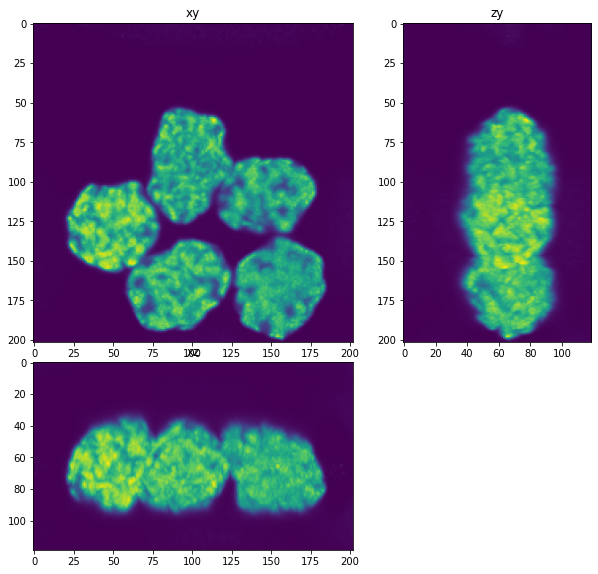

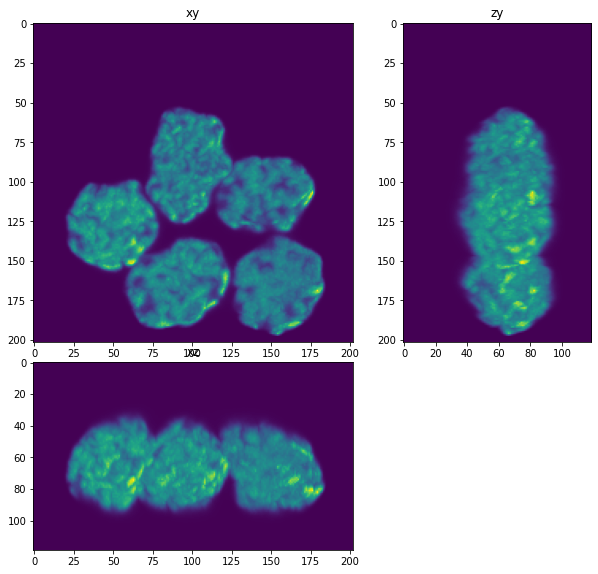

In [33]:
fig = show_xyz_max(im_decon_400)
fig = show_xyz_max(im_decon_400_rlf)

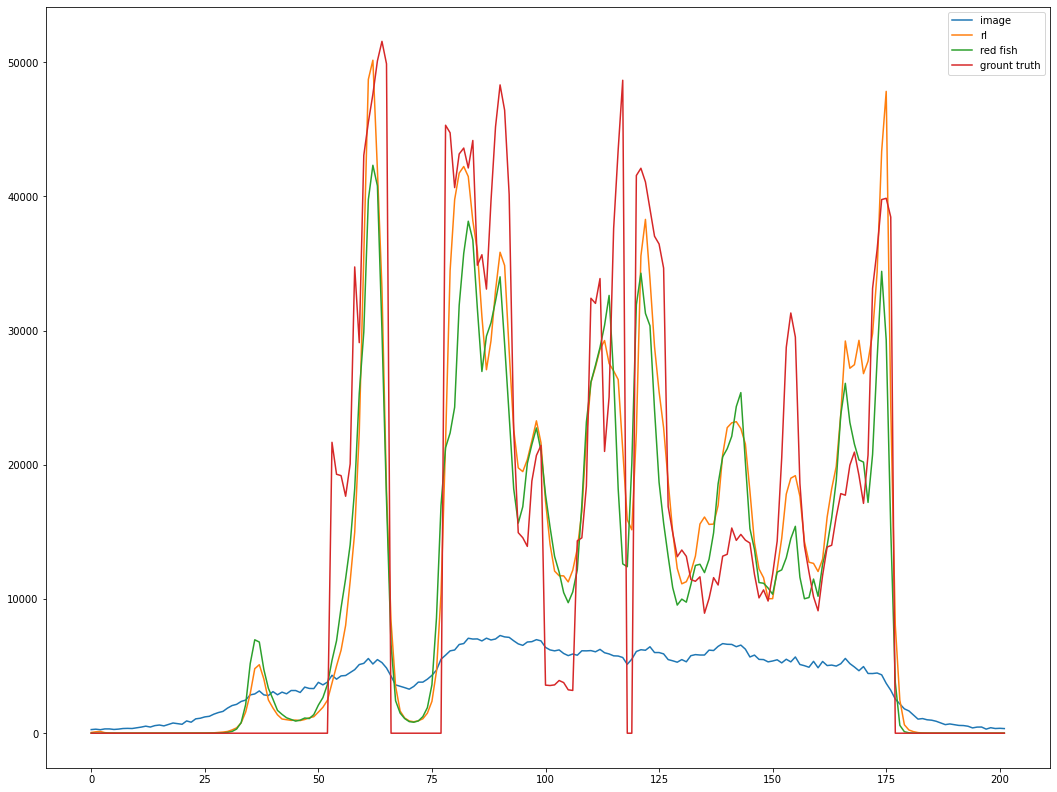

In [30]:
fig, ax = plt.subplots(figsize=(18,14))

line=im_orig[int(s[0]/2),int(s[1]/2),:]
ax.plot(line, label = 'image')

line2=im_decon_400[int(s[0]/2),int(s[1]/2),:]
ax.plot(line2, label='rl')

line3=im_decon_400_rlf[int(s[0]/2),int(s[1]/2),:]
ax.plot(line3, label='red fish')

line4=ground_truth[int(s[0]/2),int(s[1]/2),:]
ax.plot(line4, label='grount truth')
ax.legend()

In [26]:
# start napari
import napari
viewer = napari.Viewer()

# show images
#viewer.add_labels(labels.astype('int32'))#, scale = [sz,sy,sz])
#viewer.add_image(ground_truth)
#viewer.add_image(cle.pull(background_subtracted))
#viewer.add_image(im_decon)

viewer.add_image(ground_truth)
viewer.add_image(im_orig)
viewer.add_image(im_decon_1000)
viewer.add_image(im_decon_tv_0001)
viewer.add_image(im_decon_tv_00005)
#viewer.add_image(im_decon_400_rlf)


#viewer.add_labels(binary, scale = [sz,sy,sz])


C:\Users\bnort\miniconda3\envs\elephas\lib\site-packages\napari_tools_menu\__init__.py:168: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)
Exception in callback BaseAsyncIOLoop._handle_events(11880, 1)
handle: <Handle BaseAsyncIOLoop._handle_events(11880, 1)>
Traceback (most recent call last):
  File "C:\Users\bnort\miniconda3\envs\elephas\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\bnort\miniconda3\envs\elephas\lib\site-packages\tornado\platform\asyncio.py", line 189, in _handle_events
    handler_func(fileobj, events)
  File "C:\Users\bnort\miniconda3\envs\elephas\lib\site-packages\zmq\eventloop\zmqstream.py", line 452, in _handle_

<Image layer 'im_decon_tv_00005' at 0x1fcc6065720>

## Data Table

At this step we create a data table.  We use a helper to compute the region properties of the objects in our labelling and return centroid, intensity and volume of the objects in a Pandas table.

In [43]:
from tnia.segmentation.pandas_helper import get_df_centroid_intensity_volume_3D
stats=get_df_centroid_intensity_volume_3D(labels, im_decon, sx, sy, sz)

stats.head()

,x,y,z,intensity,volume
0,20.967404,9.873032,4.549152,8.590300e+07,345.322919
1,6.907200,10.639381,5.885293,9.921165e+07,375.785646
2,14.521549,23.518101,8.890713,1.154779e+08,415.742492
3,22.821594,24.550776,9.922294,1.021065e+08,375.276759
4,25.035990,8.181050,13.156101,7.846584e+07,292.251497


## Plotting

At this point we have our data in a table and we can also use Pandas (and matplotlib) to create figure. It is not a very big table.  We'd need much more data to get significant statistics.  

<AxesSubplot:ylabel='Frequency'>

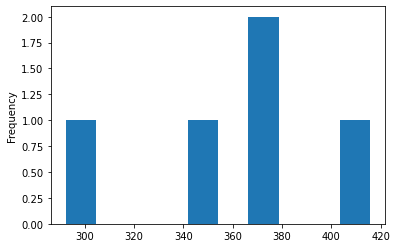

In [55]:
stats.volume.plot.hist()

In [38]:
import math
paddedsize=[im_orig.shape[0]+psf.shape[0],im_orig.shape[1]+psf.shape[1],im_orig.shape[2]+psf.shape[2]] 
padding = tuple(map(lambda i,j: ( math.ceil((i-j)/2), math.floor((i-j)/2) ),paddedsize,im_orig.shape))

In [39]:
padding

((65, 64), (128, 128), (128, 128))

In [35]:
paddedsize

(119, 202, 202, 129, 256, 256)

In [37]:
im_orig.shape

(119, 202, 202)

In [43]:
padding[0][1]

64